<a href="https://colab.research.google.com/github/Black-Jade0/AI-Models/blob/master/Exam_evaluation_using_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U keras-ocr

In [ ]:
!pip install PyMuPDF

In [ ]:
import fitz

In [ ]:
!rm -rf ~/.keras-ocr

In [ ]:
!pip install tensorflow==2.9.1 keras==2.9.0 keras-ocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 20

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
11/11 [==============================] - 88s 8s/step


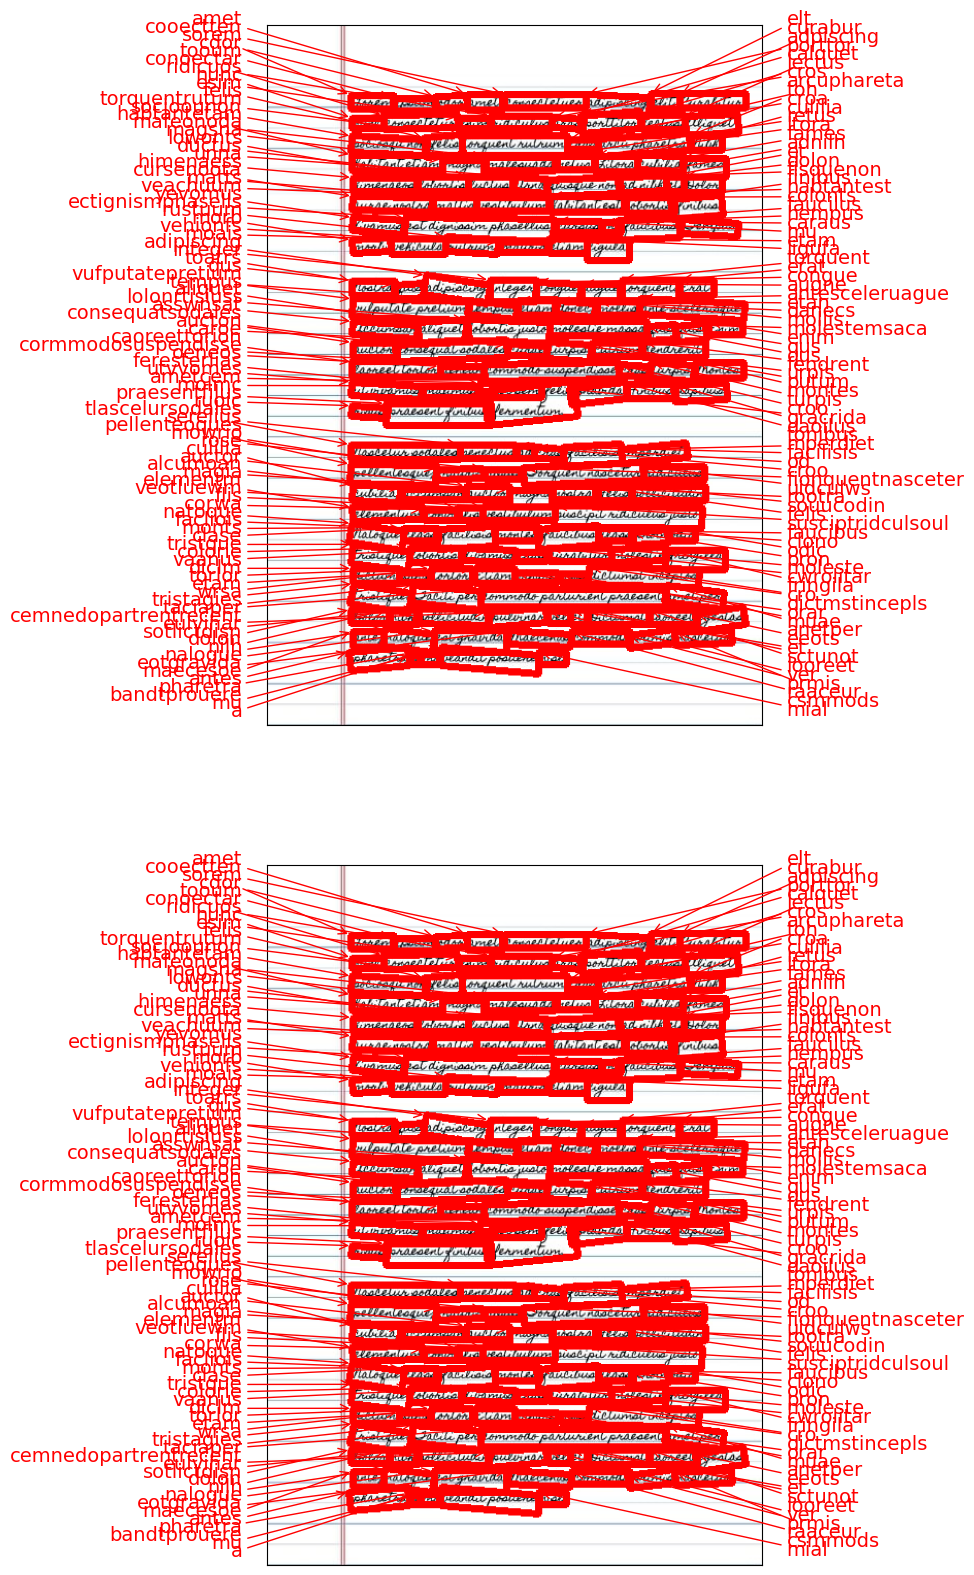

In [ ]:
import keras_ocr
import matplotlib.pyplot as plt

# Initialize the OCR pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Open the PDF
doc = fitz.open('/content/image.pdf')

# List to store all images from all pages
all_images = []

# Iterate through all pages to extract images
for page in doc:
    images = page.get_images()
    if images:  # Check if there are images on this page
        # Collect image paths for the current page
        for img in images:
            xref = img[0]
            pix = fitz.Pixmap(doc, xref)
            if pix.n - pix.alpha < 4:       # this is GRAY or RGB
                pix.save("page%s-%s.png" % (page.number, xref))
            else:               # CMYK: convert to RGB first
                pix1 = fitz.Pixmap(fitz.csRGB, pix)
                pix1.save("page%s-%s.png" % (page.number, xref))
                pix1 = None
            pix = None

        page_images = ["page%s-%s.png" % (page.number, img[0]) for img in images]
        all_images.extend(page_images)  # Add to the all_images list

        page_images = ["page%s-%s.png" % (page.number, img[0]) for img in images]
        all_images.extend(page_images)  # Add to the all_images list

# Process all collected images
if all_images:  # Check if images list is not empty
    # Load images based on their paths
    loaded_images = [keras_ocr.tools.read(image_path) for image_path in all_images]
    prediction_groups = pipeline.recognize(loaded_images)

    # Create subplots based on the number of images
    fig, axs = plt.subplots(nrows=len(loaded_images) if len(loaded_images) > 1 else 1, figsize=(10, 20))
    if len(loaded_images) == 1:
        axs = [axs]  # Make axs a list for the single image case

    # Draw annotations on the images
    for ax, image, predictions in zip(axs, loaded_images, prediction_groups):
        keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

    plt.show()


In [ ]:
for predictions in prediction_groups:
    for box, text in predictions:
        print(text)  # This will p

[[372.  66.]
 [400.  66.]
 [400.  81.]
 [372.  81.]]
[[194.  67.]
 [228.  67.]
 [228.  82.]
 [194.  82.]]
[[230.  67.]
 [309.  67.]
 [309.  80.]
 [230.  80.]]
[[400.       66.99999]
 [464.       66.99999]
 [464.       80.99999]
 [400.       80.99999]]
[[ 81.  68.]
 [123.  68.]
 [123.  81.]
 [ 81.  81.]]
[[163.54753   69.49774 ]
 [193.71721   68.0611  ]
 [194.28056   79.89142 ]
 [164.11089   81.328064]]
[[309.32      67.240005]
 [371.57233   70.69847 ]
 [370.57233   88.69847 ]
 [308.32      85.240005]]
[[122.  71.]
 [163.  71.]
 [163.  83.]
 [122.  83.]]
[[303.70587  88.14646]
 [361.30164  83.44477]
 [362.7232  100.85934]
 [305.12744 105.56103]]
[[112.82229   87.692726]
 [184.86983   86.45052 ]
 [185.10281   99.96375 ]
 [113.05528  101.205956]]
[[363.  87.]
 [405.  87.]
 [405. 101.]
 [363. 101.]]
[[405.72006  88.0841 ]
 [456.94278  86.7707 ]
 [457.4191  105.34823]
 [406.19638 106.66163]]
[[217.  88.]
 [276.  88.]
 [276. 100.]
 [217. 100.]]
[[ 82.  90.]
 [113.  90.]
 [113. 100.]
 [ 82. 1

In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 35.8 MB/s eta 0:00:00


In [ ]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [ ]:
# def correct_text(text):
#     words = text.split()
#     # Get unique words to minimize processing time
#     unique_words = set(words)

#     # Correct all unique words
#     corrected_words = {word: spell.correction(word) for word in unique_words}

#     # Replace words in the original text
#     corrected_text = ' '.join(corrected_words.get(word, word) for word in words)
#     return corrected_text

# # Assuming prediction_groups from previous cell
ocr_output_text = []

# Collect OCR output text
for predictions in prediction_groups:
    for box, text in predictions:
        ocr_output_text.append(str(text))

# Join the OCR outputs into a single string
ocr_output_text = ' '.join(ocr_output_text)

# Correct the extracted text
# corrected_answer = correct_text(ocr_output_text)
print(ocr_output_text)


[[372.  66.]
 [400.  66.]
 [400.  81.]
 [372.  81.]] [[194.  67.]
 [228.  67.]
 [228.  82.]
 [194.  82.]] [[230.  67.]
 [309.  67.]
 [309.  80.]
 [230.  80.]] [[400.       66.99999]
 [464.       66.99999]
 [464.       80.99999]
 [400.       80.99999]] [[ 81.  68.]
 [123.  68.]
 [123.  81.]
 [ 81.  81.]] [[163.54753   69.49774 ]
 [193.71721   68.0611  ]
 [194.28056   79.89142 ]
 [164.11089   81.328064]] [[309.32      67.240005]
 [371.57233   70.69847 ]
 [370.57233   88.69847 ]
 [308.32      85.240005]] [[122.  71.]
 [163.  71.]
 [163.  83.]
 [122.  83.]] [[303.70587  88.14646]
 [361.30164  83.44477]
 [362.7232  100.85934]
 [305.12744 105.56103]] [[112.82229   87.692726]
 [184.86983   86.45052 ]
 [185.10281   99.96375 ]
 [113.05528  101.205956]] [[363.  87.]
 [405.  87.]
 [405. 101.]
 [363. 101.]] [[405.72006  88.0841 ]
 [456.94278  86.7707 ]
 [457.4191  105.34823]
 [406.19638 106.66163]] [[217.  88.]
 [276.  88.]
 [276. 100.]
 [217. 100.]] [[ 82.  90.]
 [113.  90.]
 [113. 100.]
 [ 82. 1

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import nltk
from nltk import word_tokenize

In [ ]:
# Example of generating text using basic NLP
sentence = "insert node at any position in the linked lists"

keywords = ["Node", "linked ","list", "vector","head","next"]

nltk.download('punkt')
# Tokenizing the sentence
tokens = word_tokenize(sentence)


# Filtering sentence based on keywords
generated_sentence = " ".join([word for word in tokens if word in keywords])

print(generated_sentence)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install -q sentence-transformers
from sentence_transformers import SentenceTransformer, util

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 6.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
reference_ans = generated_sentence
student_ans = str(ocr_output_text)


model = SentenceTransformer('all-mpnet-base-v2')

embeddings = model.encode([reference_ans, student_ans])

# Calculate cosine similarity between the embeddings
similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1])
print(f'Semantic Similarity: {similarity.item() * 100:.2f}%')

Semantic Similarity: 13.38%


In [ ]:
def grade_answer(similarity_score):
    if similarity_score > 0.9:
        return 10  # Full marks
    elif similarity_score > 0.75:
        return 8  # Partial marks
    elif similarity_score > 0.5:
        return 5  # Minimal marks
    elif similarity_score > 0.25:
        return 3  # Minimal marks
    elif similarity_score > 0.1:
        return 2  # Minimal marks
    else:
        return 0  # No marks

score = grade_answer(similarity.item())
print(f'Student Score: {score}')

Student Score: 2
